author: agholizadgha@mun.ca

In [1]:
# dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

# Chapter 1: The Machine Learning Landscape

Example 1-1. Training and running a linear model using Scikit-Learn

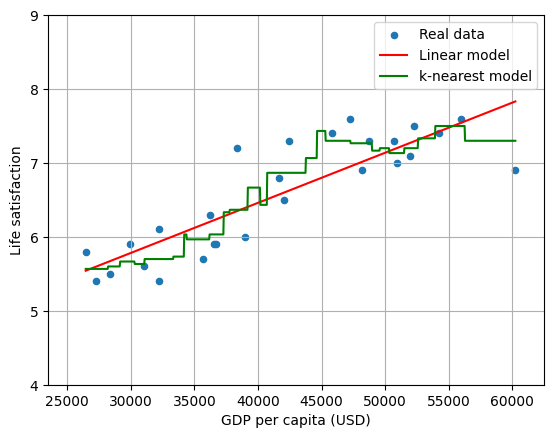

Prediction for Cyprus with GDP [[37655.2]] using LinReg model is: [[6.30165767]]
Prediction for Cyprus with GDP [[37655.2]] using k-nearest model is: [[6.33333333]]


In [10]:
# Download and prepare the data
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values
# Visualize the data
lifesat.plot(kind='scatter', grid=True,
x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
# Select a linear model
reg_model = LinearRegression()
# Train the model
reg_model.fit(X, y)

# Make the prediction line
theta_1 = reg_model.coef_[0][0]
theta_0 = reg_model.intercept_[0]
q = np.linspace(min(X), max(X), 1000)
f = q * theta_1 + theta_0
plt.plot(q, f, "r")
# ---------------------------------------------------------

# Select a k-nearest model
kn_model = KNeighborsRegressor(n_neighbors=3)
# Train the model
kn_model.fit(X, y)

# Make the prediction line
q = np.linspace(min(X), max(X), 1000)
f = kn_model.predict(q)
plt.plot(q, f, "green")
plt.legend(["Real data", "Linear model", "k-nearest model"])
plt.show()

# Make a prediction for Cyprus
X_new = [[37_655.2]] # Cyprus' GDP per capita in 2020
print(f"Prediction for Cyprus with GDP {X_new} using LinReg model is: {reg_model.predict(X_new)}")
print(f"Prediction for Cyprus with GDP {X_new} using k-nearest model is: {kn_model.predict(X_new)}")

1. **How would you define machine learning?**
    -> A computer's ability to learn patterns and make predictions based on those patterns.
2. **Can you name four types of applications where it shines?**
    -> Spam detection, Song recommendation, Cancer detection, Price prediction.
3. **What is a labeled training set?**
    -> A set of features that are manually mapped to a set of results and are being used for detecting patterns. 
4. **What are the two most common supervised tasks?**
    -> Classification, Regression
5. **Can you name four common unsupervised tasks?**
    -> Clustering, Labeling, Classification, Anamoly detection
6. **What type of algorithm would you use to allow a robot to walk in various unknown terrains?**
    -> A Reinforcement Learning algorithm
7. **What type of algorithm would you use to segment your customers into multiple groups?**
    -> Clustering, Classification
8. **Would you frame the problem of spam detection as a supervised learning problem or an unsupervised learning problem?**
    -> Semi-supervised
9. **What is an online learning system?**
    -> Continuos learning with the new data stream
10. **What is out-of-core learning?**
    -> Online learining with small bathches of data for large datasets
11. **What type of algorithm relies on a similarity measure to make predictions?**
    -> Instance-based learning (e. g. k-nearest neighbor method)
12. **What is the difference between a model parameter and a model hyperparameter?**
    -> Model parameters are set during the learning process while hyperparameters are set when building the model
13. **What do model-based algorithms search for? What is the most common strategy they use to succeed? How do they make predictions?** -> Model-based algorithms pick a model and follow a cost optimization process for that chosen model
14. **Can you name four of the main challenges in machine learning?15. If your model performs great on the training data but generalizes poorly to new instances, what is happening? Can you name three possible solutions?** -> Challenges: Data efficiency, data quality, model and feature selection, model optimization and avoiding model under and overfit. \
This problem is called moedl over-fit. \
To avoid over-fitting you can pick a simpler model, optimize the hyperparameters, or use a larger dataset with less noise
16. **What is a test set, and why would you want to use it?** -> Test set is used to perform final evaluation on a prediction model before it's launched to production.
17. **What is the purpose of a validation set?** -> Validation sets are used to optimize hyperparameters and help with choosing the best model between multiple models.
18. **What is the train-dev set, when do you need it, and how do you use it?** -> Train-dev set along with dev set are used to detect data mismatch and model overfit.
19. **What can go wrong if you tune hyperparameters using the test set?** -> Then you have made a model optimized just for the test, not the new data.

# Chapter 2. End-to-End Machine Learning Project

p. 99: The function to fetch and load the housing data:

In [12]:
from pathlib import Path
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [13]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [17]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [18]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

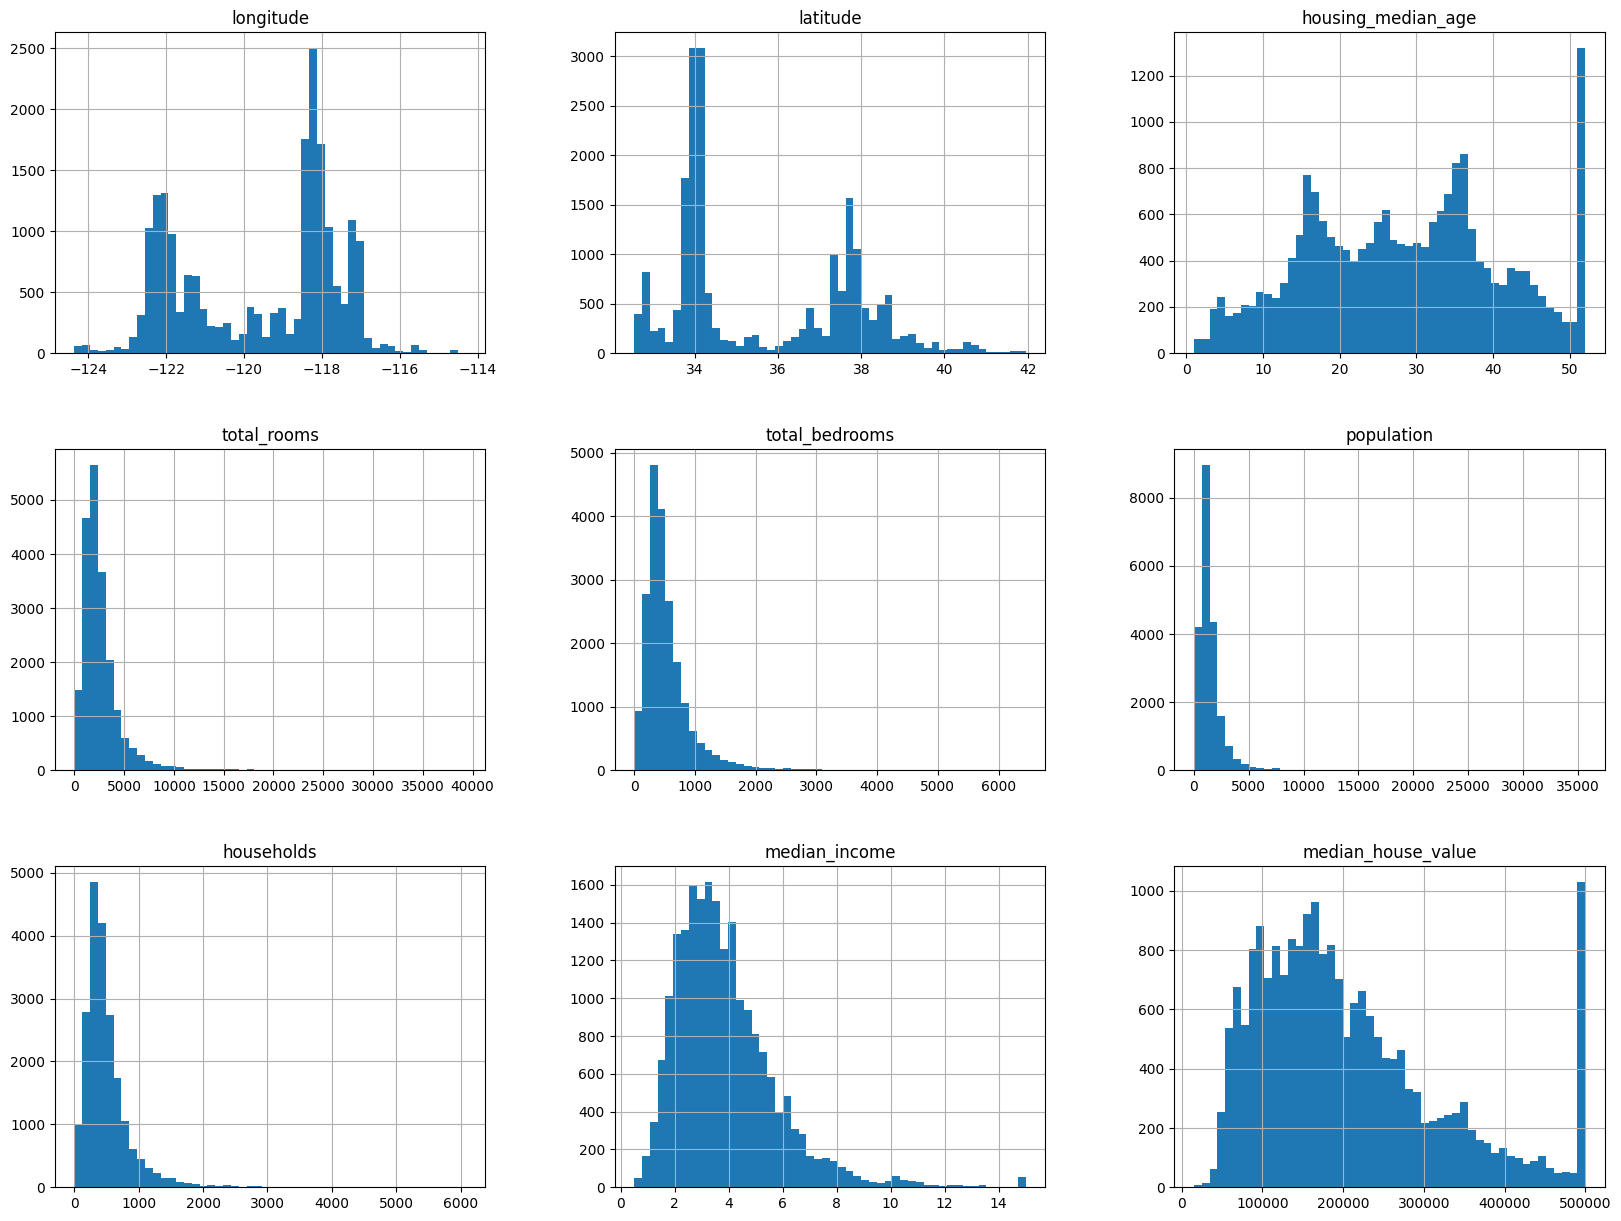

In [19]:
housing.hist(bins=50, figsize=(20,15))

In [35]:
# split the data into training and test sets

# first method: shuffle indices and split
def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

# second method: hash the indices and split
from zlib import crc32
def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

# third method: use sklearn's train_test_split
from sklearn.model_selection import train_test_split

In [29]:
housing_with_id = housing.reset_index()
housing_with_id

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [30]:
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

In [34]:
test_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
16,16,-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20615,20615,-121.54,39.08,23.0,1076.0,216.0,724.0,197.0,2.3598,57500.0,INLAND
20617,20617,-121.53,39.06,20.0,561.0,109.0,308.0,114.0,3.3021,70800.0,INLAND
20622,20622,-121.44,39.00,20.0,755.0,147.0,457.0,157.0,2.4167,67000.0,INLAND
20626,20626,-121.43,39.18,36.0,1124.0,184.0,504.0,171.0,2.1667,93800.0,INLAND


In [36]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [37]:
# creating strata for income categories
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

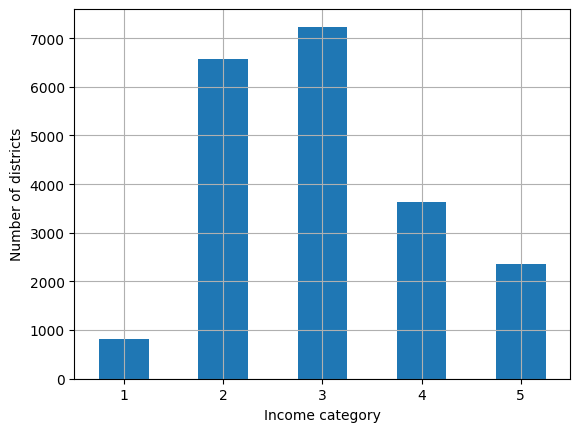

In [38]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [47]:
# first method: use sklearn's StratifiedShuffleSplit

from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []

for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])
# run: strat_train_set, strat_test_set = strat_splits[0]

# second method: use sklearn's train_test_split
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [49]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [50]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3905,-121.95,37.11,21.0,2387.0,357.0,913.0,341.0,7.7360,397700.0,<1H OCEAN
16821,-118.01,33.89,36.0,1589.0,265.0,804.0,272.0,4.6354,202900.0,<1H OCEAN
2900,-118.18,33.74,30.0,5915.0,1750.0,2136.0,1503.0,4.0968,310000.0,NEAR OCEAN
7193,-122.48,37.74,52.0,2166.0,423.0,1072.0,370.0,4.1310,314300.0,NEAR OCEAN
13928,-122.39,37.78,5.0,1405.0,515.0,725.0,392.0,3.6037,187500.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
12369,-124.16,40.79,46.0,3042.0,597.0,1206.0,541.0,2.1135,90600.0,NEAR OCEAN
8707,-119.01,35.39,29.0,1820.0,459.0,1134.0,419.0,1.8289,59400.0,INLAND
16634,-123.01,38.67,33.0,914.0,147.0,394.0,132.0,4.6875,246200.0,<1H OCEAN
9779,-122.03,37.60,24.0,2077.0,383.0,1488.0,389.0,4.5721,214700.0,NEAR BAY
